## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

base_path = 'data/'

## Movies dataset

Lets explore movies dataset

In [2]:
#movies = pd.read_csv('/home/fakhar/Data/Projects/movie_rec/movies.dat', encoding="ISO-8859-1", sep="\t")
movies = pd.read_table(base_path+'movies.dat', encoding="ISO-8859-1")
print(movies)

          id                        title   imdbID  \
0          1                    Toy story   114709   
1          2                      Jumanji   113497   
2          3               Grumpy Old Men   107050   
3          4            Waiting to Exhale   114885   
4          5  Father of the Bride Part II   113041   
...      ...                          ...      ...   
10192  65088              Bedtime Stories   960731   
10193  65091          Manhattan Melodrama    25464   
10194  65126                        Choke  1024715   
10195  65130           Revolutionary Road   959337   
10196  65133      Blackadder Back & Forth   212579   

                                            spanishTitle  \
0                                   Toy story (juguetes)   
1                                                Jumanji   
2                                    Dos viejos gruñones   
3                                   Esperando un respiro   
4      Vuelve el padre de la novia (Ahora también a

Just to get overview of all columns in movies dataset.

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10197 entries, 0 to 10196
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      10197 non-null  int64 
 1   title                   10197 non-null  object
 2   imdbID                  10197 non-null  int64 
 3   spanishTitle            10197 non-null  object
 4   imdbPictureURL          10016 non-null  object
 5   year                    10197 non-null  int64 
 6   rtID                    9886 non-null   object
 7   rtAllCriticsRating      10197 non-null  object
 8   rtAllCriticsNumReviews  10197 non-null  object
 9   rtAllCriticsNumFresh    10197 non-null  object
 10  rtAllCriticsNumRotten   10197 non-null  object
 11  rtAllCriticsScore       10197 non-null  object
 12  rtTopCriticsRating      10197 non-null  object
 13  rtTopCriticsNumReviews  10197 non-null  object
 14  rtTopCriticsNumFresh    10197 non-null  object
 15  rt

Checking missing values for important atributes.

Just imdbPictureURL has 181 missing values.

In [4]:
print(movies.id.isna().sum())
print(movies.title.isna().sum())
print(movies.year.isna().sum())
print(movies.imdbPictureURL.isna().sum())
print(movies.rtPictureURL.isna().sum())

0
0
0
181
0


In [5]:
movies = movies[['id', 'title', 'year']]

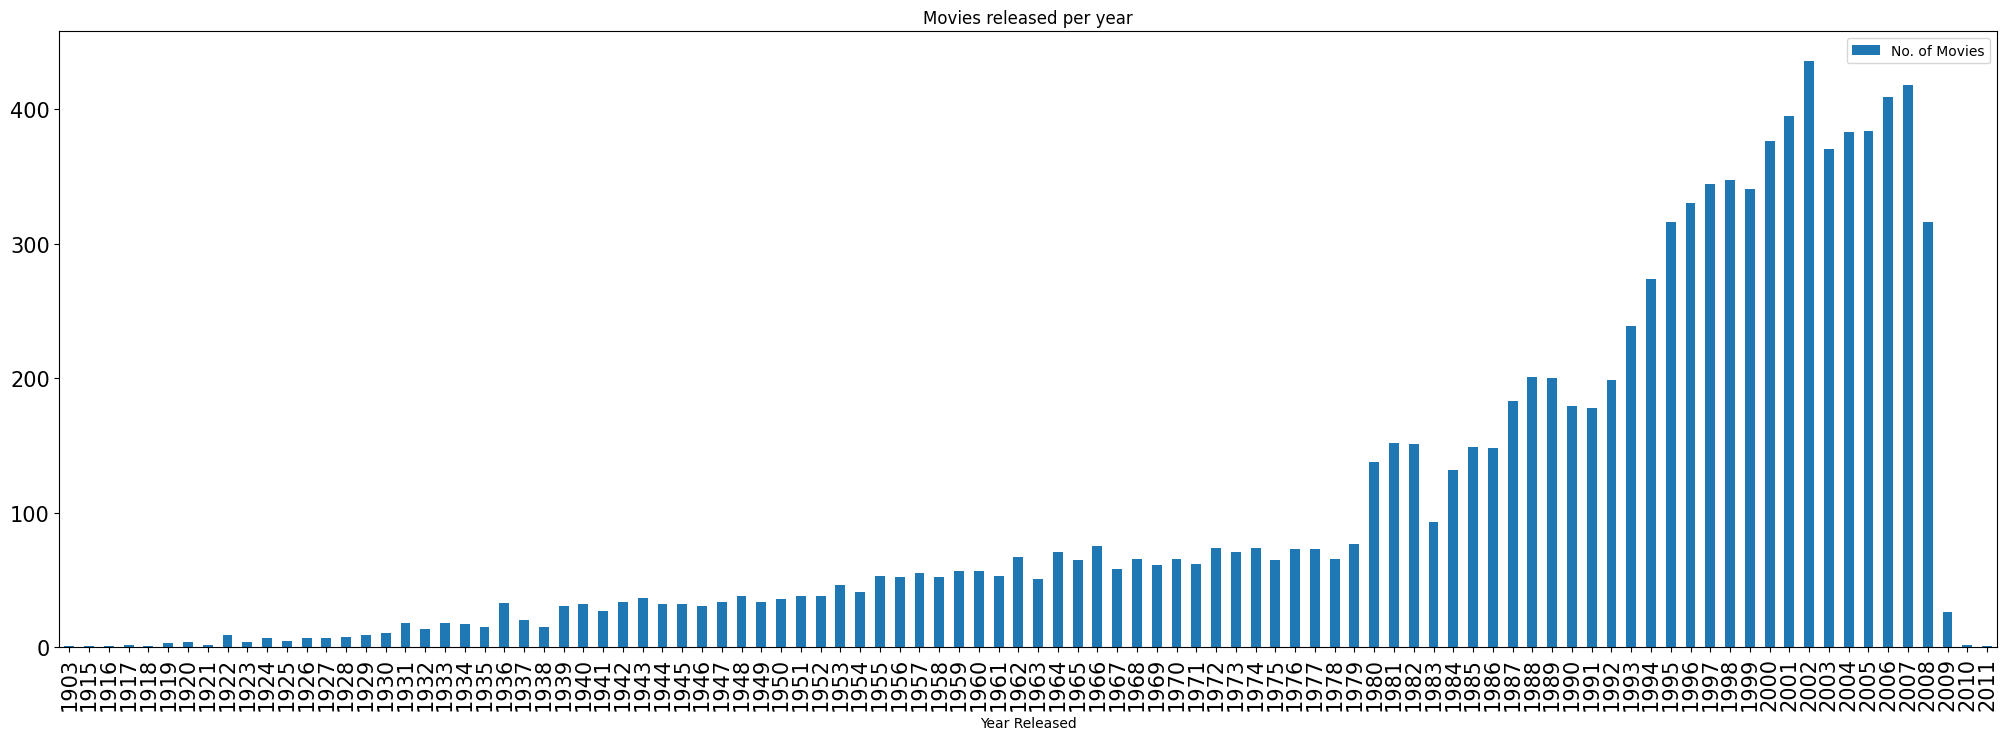

In [6]:
movie_year_data = movies[['year', 'id']].groupby(['year']).count().reset_index().rename(columns={'year':'Year Released', 'id':'No. of Movies'})
movie_year_data.plot.bar('Year Released', 'No. of Movies', title='Movies released per year', figsize=(25, 8), fontsize=15);

In [7]:
movie_genres = pd.read_table(base_path+'movie_genres.dat', encoding="ISO-8859-1")
print(movie_genres)

       movieID      genre
0            1  Adventure
1            1  Animation
2            1   Children
3            1     Comedy
4            1    Fantasy
...        ...        ...
20804    65126     Comedy
20805    65126      Drama
20806    65130      Drama
20807    65130    Romance
20808    65133     Comedy

[20809 rows x 2 columns]


In [8]:
genres_unique = movie_genres['genre'].unique()
print(genres_unique)


['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Mystery' 'Sci-Fi' 'IMAX'
 'Documentary' 'War' 'Musical' 'Film-Noir' 'Western' 'Short']


In [9]:
print(movie_genres.movieID.isna().sum())
print(movie_genres.genre.isna().sum())

0
0


In [10]:
tags = pd.read_csv(base_path+'tags.dat', encoding="ISO-8859-1", sep="\t")
print(tags)

          id            value
0          1            earth
1          2           police
2          3           boxing
3          4          painter
4          5            whale
...      ...              ...
13217  16524  good in its day
13218  16525           isaiah
13219  16527      top 5 movie
13220  16528        vontatott
13221  16529              tps

[13222 rows x 2 columns]


In [11]:
print(tags.id.isna().sum())
print(tags.value.isna().sum())


0
0


In [12]:
movie_tags = pd.read_csv(base_path+'movie_tags.dat', encoding="ISO-8859-1", sep="\t")
print(movie_tags)

       movieID  tagID  tagWeight
0            1      7          1
1            1     13          3
2            1     25          3
3            1     55          3
4            1     60          1
...        ...    ...        ...
51790    65037    792          1
51791    65037   2214          1
51792    65126   5281          1
51793    65126  13168          1
51794    65130   2924          1

[51795 rows x 3 columns]


In [13]:
print(movie_tags.movieID.isna().sum())
print(movie_tags.tagID.isna().sum())
print(movie_tags.tagWeight.isna().sum())
print('No. of Unique movies', movie_tags.movieID.nunique())
print('No. of Unique tags', movie_tags.tagID.nunique())
print('No. of Unique movies tag weight', movie_tags.tagWeight.nunique())

0
0
0
No. of Unique movies 7155
No. of Unique tags 5297
No. of Unique movies tag weight 30


In [14]:
print(movie_tags.tagWeight.value_counts())

1     42306
2      5808
3      1669
4       767
5       405
6       250
7       148
8       118
9        75
10       68
11       48
12       29
13       21
14       15
15       11
18       10
19        9
17        9
16        8
21        5
24        3
20        3
22        2
23        2
29        1
42        1
40        1
28        1
25        1
33        1
Name: tagWeight, dtype: int64


In [15]:
movie_actors = pd.read_table(base_path+'movie_actors.dat', encoding="ISO-8859-1")
print(movie_actors)

        movieID          actorID        actorName  ranking
0             1      annie_potts      Annie Potts       10
1             1      bill_farmer      Bill Farmer       20
2             1      don_rickles      Don Rickles        3
3             1  erik_von_detten  Erik von Detten       13
4             1        greg-berg        Greg Berg       17
...         ...              ...              ...      ...
231737    65133       rik_mayall       Rik Mayall        6
231738    65133   rowan_atkinson   Rowan Atkinson        7
231739    65133      stephen_fry      Stephen Fry        8
231740    65133    tim_mcinnerny    Tim McInnerny        9
231741    65133    tony_robinson    Tony Robinson       10

[231742 rows x 4 columns]


In [16]:
print(movie_actors.movieID.isna().sum())
print(movie_actors.actorID.isna().sum())
print(movie_actors.actorName.isna().sum())
print(movie_actors.ranking.isna().sum())

0
0
5
0


In [17]:
movie_directors = pd.read_csv(base_path+'movie_directors.dat', encoding="ISO-8859-1", sep="\t")
print(movie_directors)

       movieID       directorID     directorName
0            1    john_lasseter    John Lasseter
1            2     joe_johnston     Joe Johnston
2            3    donald_petrie    Donald Petrie
3            4  forest_whitaker  Forest Whitaker
4            5    charles_shyer    Charles Shyer
...        ...              ...              ...
10150    65088    adam_shankman    Adam Shankman
10151    65091      ws_van_dyke    W.S. Van Dyke
10152    65126      clark_gregg      Clark Gregg
10153    65130       sam_mendes       Sam Mendes
10154    65133     paul_weiland     Paul Weiland

[10155 rows x 3 columns]


In [18]:
print(movie_directors.movieID.isna().sum())
print(movie_directors.directorID.isna().sum())
print(movie_directors.directorName.isna().sum())

0
0
0
